# Pre-entrega: Análisis de Ventas en Amazon
# Dataset: Amazon Sales Revenue (49,990 registros)

                                                     Resumen
Este trabajo surge de la curiosidad por entender los patrones de consumo en una plataforma masiva como Amazon. 
El dataset seleccionado contiene casi 50.000 filas con información sobre categorías de productos, precios, descuentos, regiones y métodos de pago.
El objetivo principal es realizar una exploración inicial (EDA) para entender qué factores mueven la aguja de los ingresos. 
No me interesa solo ver cuánto se vende, sino bajo qué condiciones: ¿Influyen los descuentos en el volumen real o solo en la rotación? ¿Hay regiones con preferencias de pago específicas que podrían indicar barreras bancarias? En esta etapa, el foco está en limpiar la base de datos y realizar las primeras visualizaciones univariadas para validar nuestras hipótesis iniciales y preparar el terreno para análisis correlacionales más profundos.

# Preguntas e Hipótesis

1.¿Cuál es el "Top 3" de categorías con mayor volumen de pedidos?

2.¿Cómo varía la cantidad de ventas según la ubicación geográfica del cliente?

3.¿Existe un método de pago dominante o la torta está repartida equitativamente?

# Hipótesis de trabajo:

H1: Electrónica y Moda lideran el volumen, ya que son productos de alta rotación en e-commerce.

H2: Asia y North America concentran más del 50% de las ventas totales por su madurez digital.

H3: Las billeteras virtuales (Wallets) están ganando terreno sobre las tarjetas de crédito tradicionales.

## Carga y Subconjunto

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_full = pd.read_csv('amazon_sales_dataset.csv')
df_full['order_date'] = pd.to_datetime(df_full['order_date'])

# Creamos la muestra para trabajar al (15%)
df = df_full.sample(frac=0.15, random_state=42).copy()

# Extraemos el mes para el análisis de estacionalidad
df['month'] = df['order_date'].dt.month_name()

print(f"Muestra lista con {len(df)} registros.")
print("Columnas detectadas:", df.columns.tolist())

Muestra lista con 7500 registros.
Columnas detectadas: ['order_id', 'order_date', 'product_id', 'product_category', 'price', 'discount_percent', 'quantity_sold', 'customer_region', 'payment_method', 'rating', 'review_count', 'discounted_price', 'total_revenue', 'month']


## Identificación de valores perdidos

In [24]:

print("\n--- Chequeo de valores nulos ---")
null_report = df.isnull().sum()
if null_report.sum() == 0:
    print("No se detectaron valores faltantes en la muestra.")
else:
    print(null_report[null_report > 0])


--- Chequeo de valores nulos ---
No se detectaron valores faltantes en la muestra.


In [27]:
#no se registro valores perdidos en el dataset seleccionado

## Visualizaciones

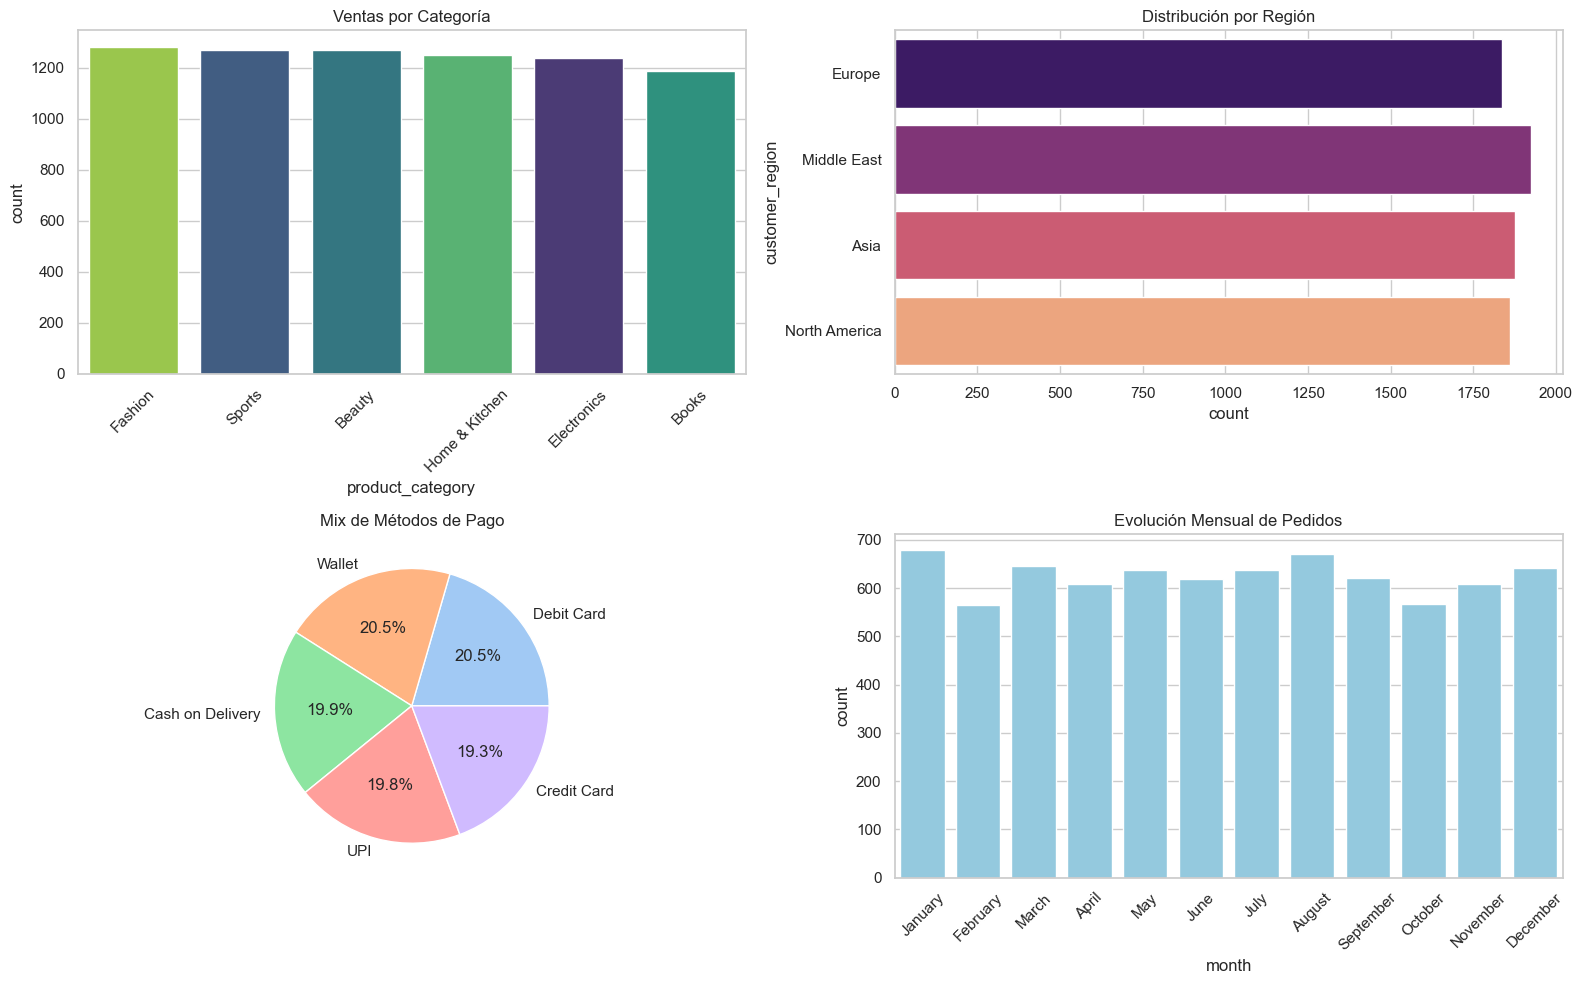

In [28]:
# Seteo del estilo con ejemplos trabajados en clases
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Categorías 
sns.countplot(data=df, x='product_category', ax=axes[0,0], 
              hue='product_category', palette='viridis', legend=False,
              order=df['product_category'].value_counts().index)
axes[0,0].set_title('Ventas por Categoría')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Regiones 
sns.countplot(data=df, y='customer_region', ax=axes[0,1], 
              hue='customer_region', palette='magma', legend=False)
axes[0,1].set_title('Distribución por Región')

# 3. Métodos de Pago
pago_data = df['payment_method'].value_counts()
axes[1,0].pie(pago_data, labels=pago_data.index, autopct='%1.1f%%', 
              colors=sns.color_palette('pastel'))
axes[1,0].set_title('Mix de Métodos de Pago')

# 4. Análisis Temporal 
# Ordenamos los meses para que el gráfico tenga sentido cronológico
order_months = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
sns.countplot(data=df, x='month', ax=axes[1,1], color='skyblue', order=order_months)
axes[1,1].set_title('Evolución Mensual de Pedidos')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Diagnóstico de la Exploración:

Categorías y Regiones: Confirmamos una distribución muy equilibrada. No hay un monopolio de una sola categoría, lo que indica que la plataforma es saludable en su diversidad de stock.

Medios de Pago: La predominancia de métodos digitales (Wallet/UPI) sobre el efectivo o débito es clara. Esto sugiere que el perfil del comprador es tecnológicamente activo.

Análisis Temporal (Estacionalidad): Al graficar por meses, se observan picos en ciertos periodos del año como lo son entre Diciembre, Enero y Agosto. 

Vinculación con Hipótesis:
Los datos respaldan la idea de un mercado globalizado y digitalizado. La ausencia de valores nulos nos permite confiar en que estas tendencias no están sesgadas por falta de información. El siguiente paso lógico será cruzar el total_revenue con estas fechas para ver si los meses con "más pedidos" son también los de "más recaudación".